### Candidate number: 1030
***
## Exercise 4

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import seaborn as sns

In [118]:
class StockData:
    def __init__(self, tickers, start, end, names, period='11Y'):
        self.tickers = tickers
        self.names = {self.tickers[i]: names[i] for i in range(len(tickers))}
        self.df = yf.download(self.tickers, period=period, ignore_tz=True, progress=False)
        self.close = pd.DataFrame(self.df['Adj Close']).loc['2013-01-01':'2023-01-01']
        self.returns = np.log(self.close/self.close.shift()).dropna()
        self.cov = self.returns.cov()

# Ticker symbols:
tickers = ['EQNR.OL', 'DNB.OL', 'MOWI.OL', 'KOG.OL', 'AKRBP.OL']
# Stock names:
stock_names = ['Equinor', 'DNB', 'MOWI', 'Kongsberg Gruppen', 'Aker BP']
# Stock data:
data = StockData(tickers, '2013-01-01', '2023-05-31', names=stock_names)



#### a.)

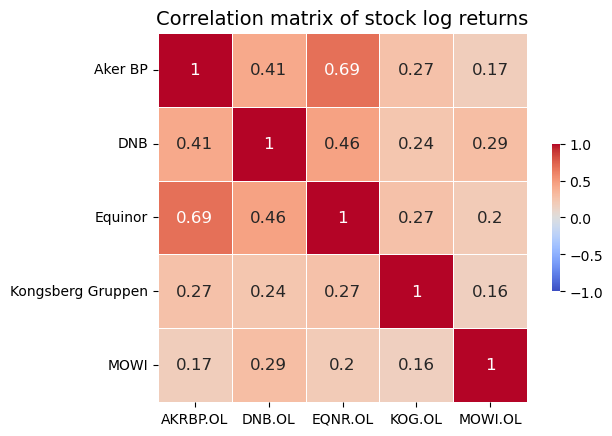

In [119]:
# Correlation matrix
fig, ax = plt.subplots()
sns.heatmap(data.returns.corr(), ax=ax, square = True, linewidths = .5, cmap = 'coolwarm', cbar_kws = {'shrink': .4, 'ticks' : [-1, -.5, 0, 0.5, 1]}, vmin = -1, vmax = 1, annot = True, annot_kws = {'size': 12})
ax.set_yticklabels(sorted(stock_names), rotation = 0)
ax.set_title('Correlation matrix of stock log returns', fontsize=14);


Equinor has a weak correlation with MOWI and Kongsberg, a medium strong correlation with DNB, and a relatively strong correlation with Aker BP. The strong correlation with Aker BP could be explained by the similarities between the companies, both being oil & gas producers.

#### b.)


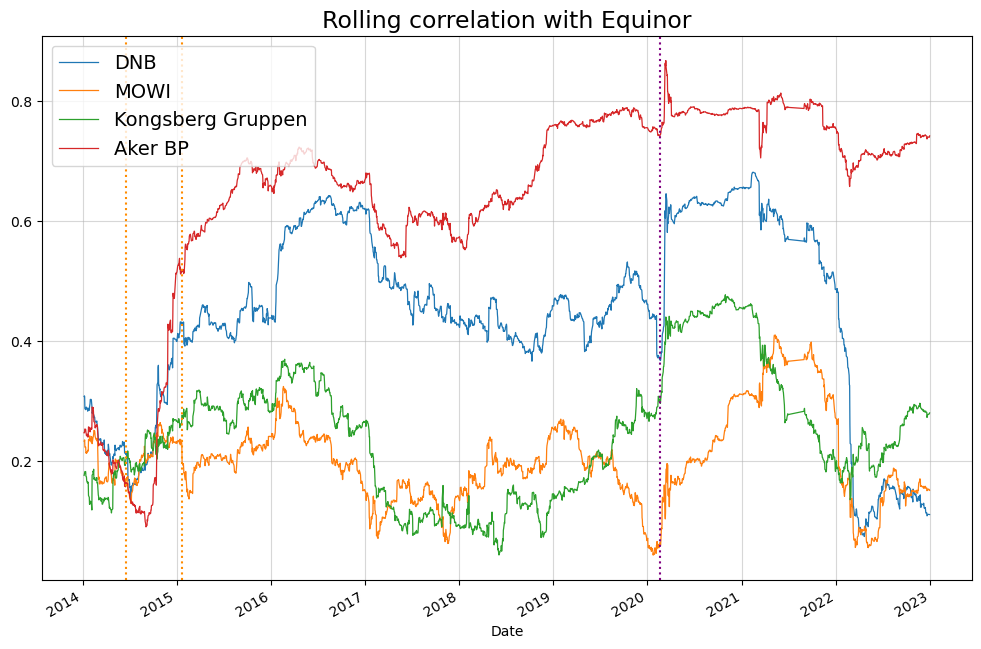

In [109]:
# Rolling window
window = 252

fig, ax = plt.subplots(1, figsize=(12, 8))

# Rolling correlation with Equinor
for ticker in ['DNB.OL', 'MOWI.OL', 'KOG.OL', 'AKRBP.OL']:
    data.returns['EQNR.OL'].rolling(window).corr(data.returns[ticker]).plot(ax=ax, linewidth=0.9, label=data.names[ticker])

# Plot tile, legend and grid
ax.set_title('Rolling correlation with Equinor', fontsize=17)
ax.legend(fontsize=14, loc='upper left')
ax.grid(alpha=0.5)

# Covid 19 Stock market crash
ax.axvline('2020-02-20', linewidth=1.5, linestyle=':', color='purple')

# June 2014 Oil price crash
ax.axvline('2014-06-20', linewidth=1.5, linestyle=':', color='darkorange')
ax.axvline('2015-01-20', linewidth=1.5, linestyle=':', color='darkorange')


#### Discussion

Aker BP has the overall highest rolling correlation with Equinor, which is expected as both are Oil & Gas operating companies. 

We can observe large increases in correlation after the covid-19 stock market crash, which is exppected as periods of high volatility in stock markets is linked with strong correlations stocks in almost all sectors (Jr & Franca, 2011).
We can also observe a large increse in correlation during the 2014-2015 oil price crash, but this mainly only affected Aker BP, which could indicate that the volatillity spillover from commodity markets like oil, to to the stock market, isnt as profound as the spillover between different sectors in the stock market during a stock market crash.


#### References

Jr, L., & Franca, I. (2011). Correlation of financial markets in times of crisis. Physica A: Statistical Mechanics and Its Applications, 391. https://doi.org/10.1016/j.physa.2011.07.023
